In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [3]:
sales_df = pd.read_excel("LifeInsuranceSales.xlsx", sheet_name= 'Sales')
sales_df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [91]:
sales_df.shape

(4520, 23)

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [5]:
sales_df.iloc[:, 1:].describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AgentBonus,4520,NaN,NaN,NaN,4077.84,1403.32,1605,3027.75,3911.5,4867.25,9608
Age,4251,NaN,NaN,NaN,14.4947,9.03763,2,7,13,20,58
CustTenure,4294,NaN,NaN,NaN,14.469,8.96367,2,7,13,20,57
Channel,4520,3,Agent,3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,4520,5,Salaried,2192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,4520,7,Graduate,1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4520,3,Male,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExistingProdType,4520,NaN,NaN,NaN,3.68894,1.01577,1,3,4,4,6
Designation,4520,6,Manager,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPolicy,4475,NaN,NaN,NaN,3.56536,1.45593,1,2,4,5,6


In [6]:
for i in sales_df.columns:
    if(sales_df[i].dtype == 'object'):
        print(i, ":" , sales_df[i].unique())

Channel : ['Agent' 'Third Party Partner' 'Online']
Occupation : ['Salaried' 'Free Lancer' 'Small Business' 'Laarge Business'
 'Large Business']
EducationField : ['Graduate' 'Post Graduate' 'UG' 'Under Graduate' 'Engineer' 'Diploma'
 'MBA']
Gender : ['Female' 'Male' 'Fe male']
Designation : ['Manager' 'Exe' 'Executive' 'VP' 'AVP' 'Senior Manager']
MaritalStatus : ['Single' 'Divorced' 'Unmarried' 'Married']
Zone : ['North' 'West' 'East' 'South']
PaymentMethod : ['Half Yearly' 'Yearly' 'Quarterly' 'Monthly']


In [7]:
#replacing the duplicate words in Gender, Occupation, EducationField & Designation variable

sales_df.Gender.replace('Fe male', 'Female', inplace = True)
print(sales_df.Gender.unique())

sales_df.Occupation.replace('Laarge Business', 'Large Business', inplace = True)
print(sales_df.Occupation.unique())


sales_df.EducationField.replace('UG', 'Under Graduate', inplace = True)
print(sales_df.EducationField.unique())

sales_df.MaritalStatus.replace('Single', 'Single/Unmarried', inplace = True)


sales_df.MaritalStatus.replace('Unmarried', 'Single/Unmarried', inplace = True)
print(sales_df.MaritalStatus.unique())


sales_df.Designation.replace('Exe', 'Executive', inplace = True)


sales_df.Designation.replace('VP', 'AVP-VP', inplace = True)


sales_df.Designation.replace('AVP', 'AVP-VP', inplace = True)
print(sales_df.Designation.unique())

['Female' 'Male']
['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
['Graduate' 'Post Graduate' 'Under Graduate' 'Engineer' 'Diploma' 'MBA']
['Single/Unmarried' 'Divorced' 'Married']
['Manager' 'Executive' 'AVP-VP' 'Senior Manager']


In [8]:
#checking for duplicates
sales_df.iloc[:, 1:].duplicated().sum()

0

In [9]:
#checking for missing values
sales_df.isna().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

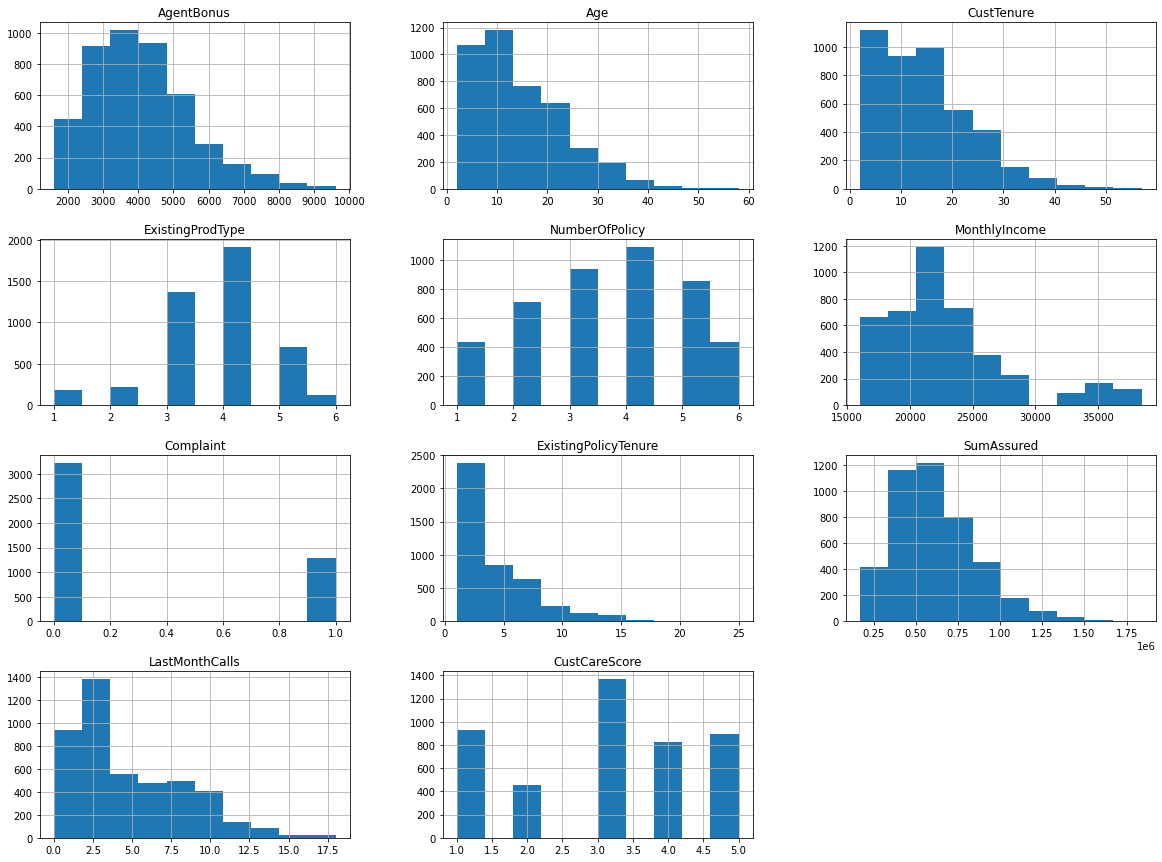

In [10]:
sales_df.iloc[:, 1:].hist(figsize = (20,15))
plt.show()

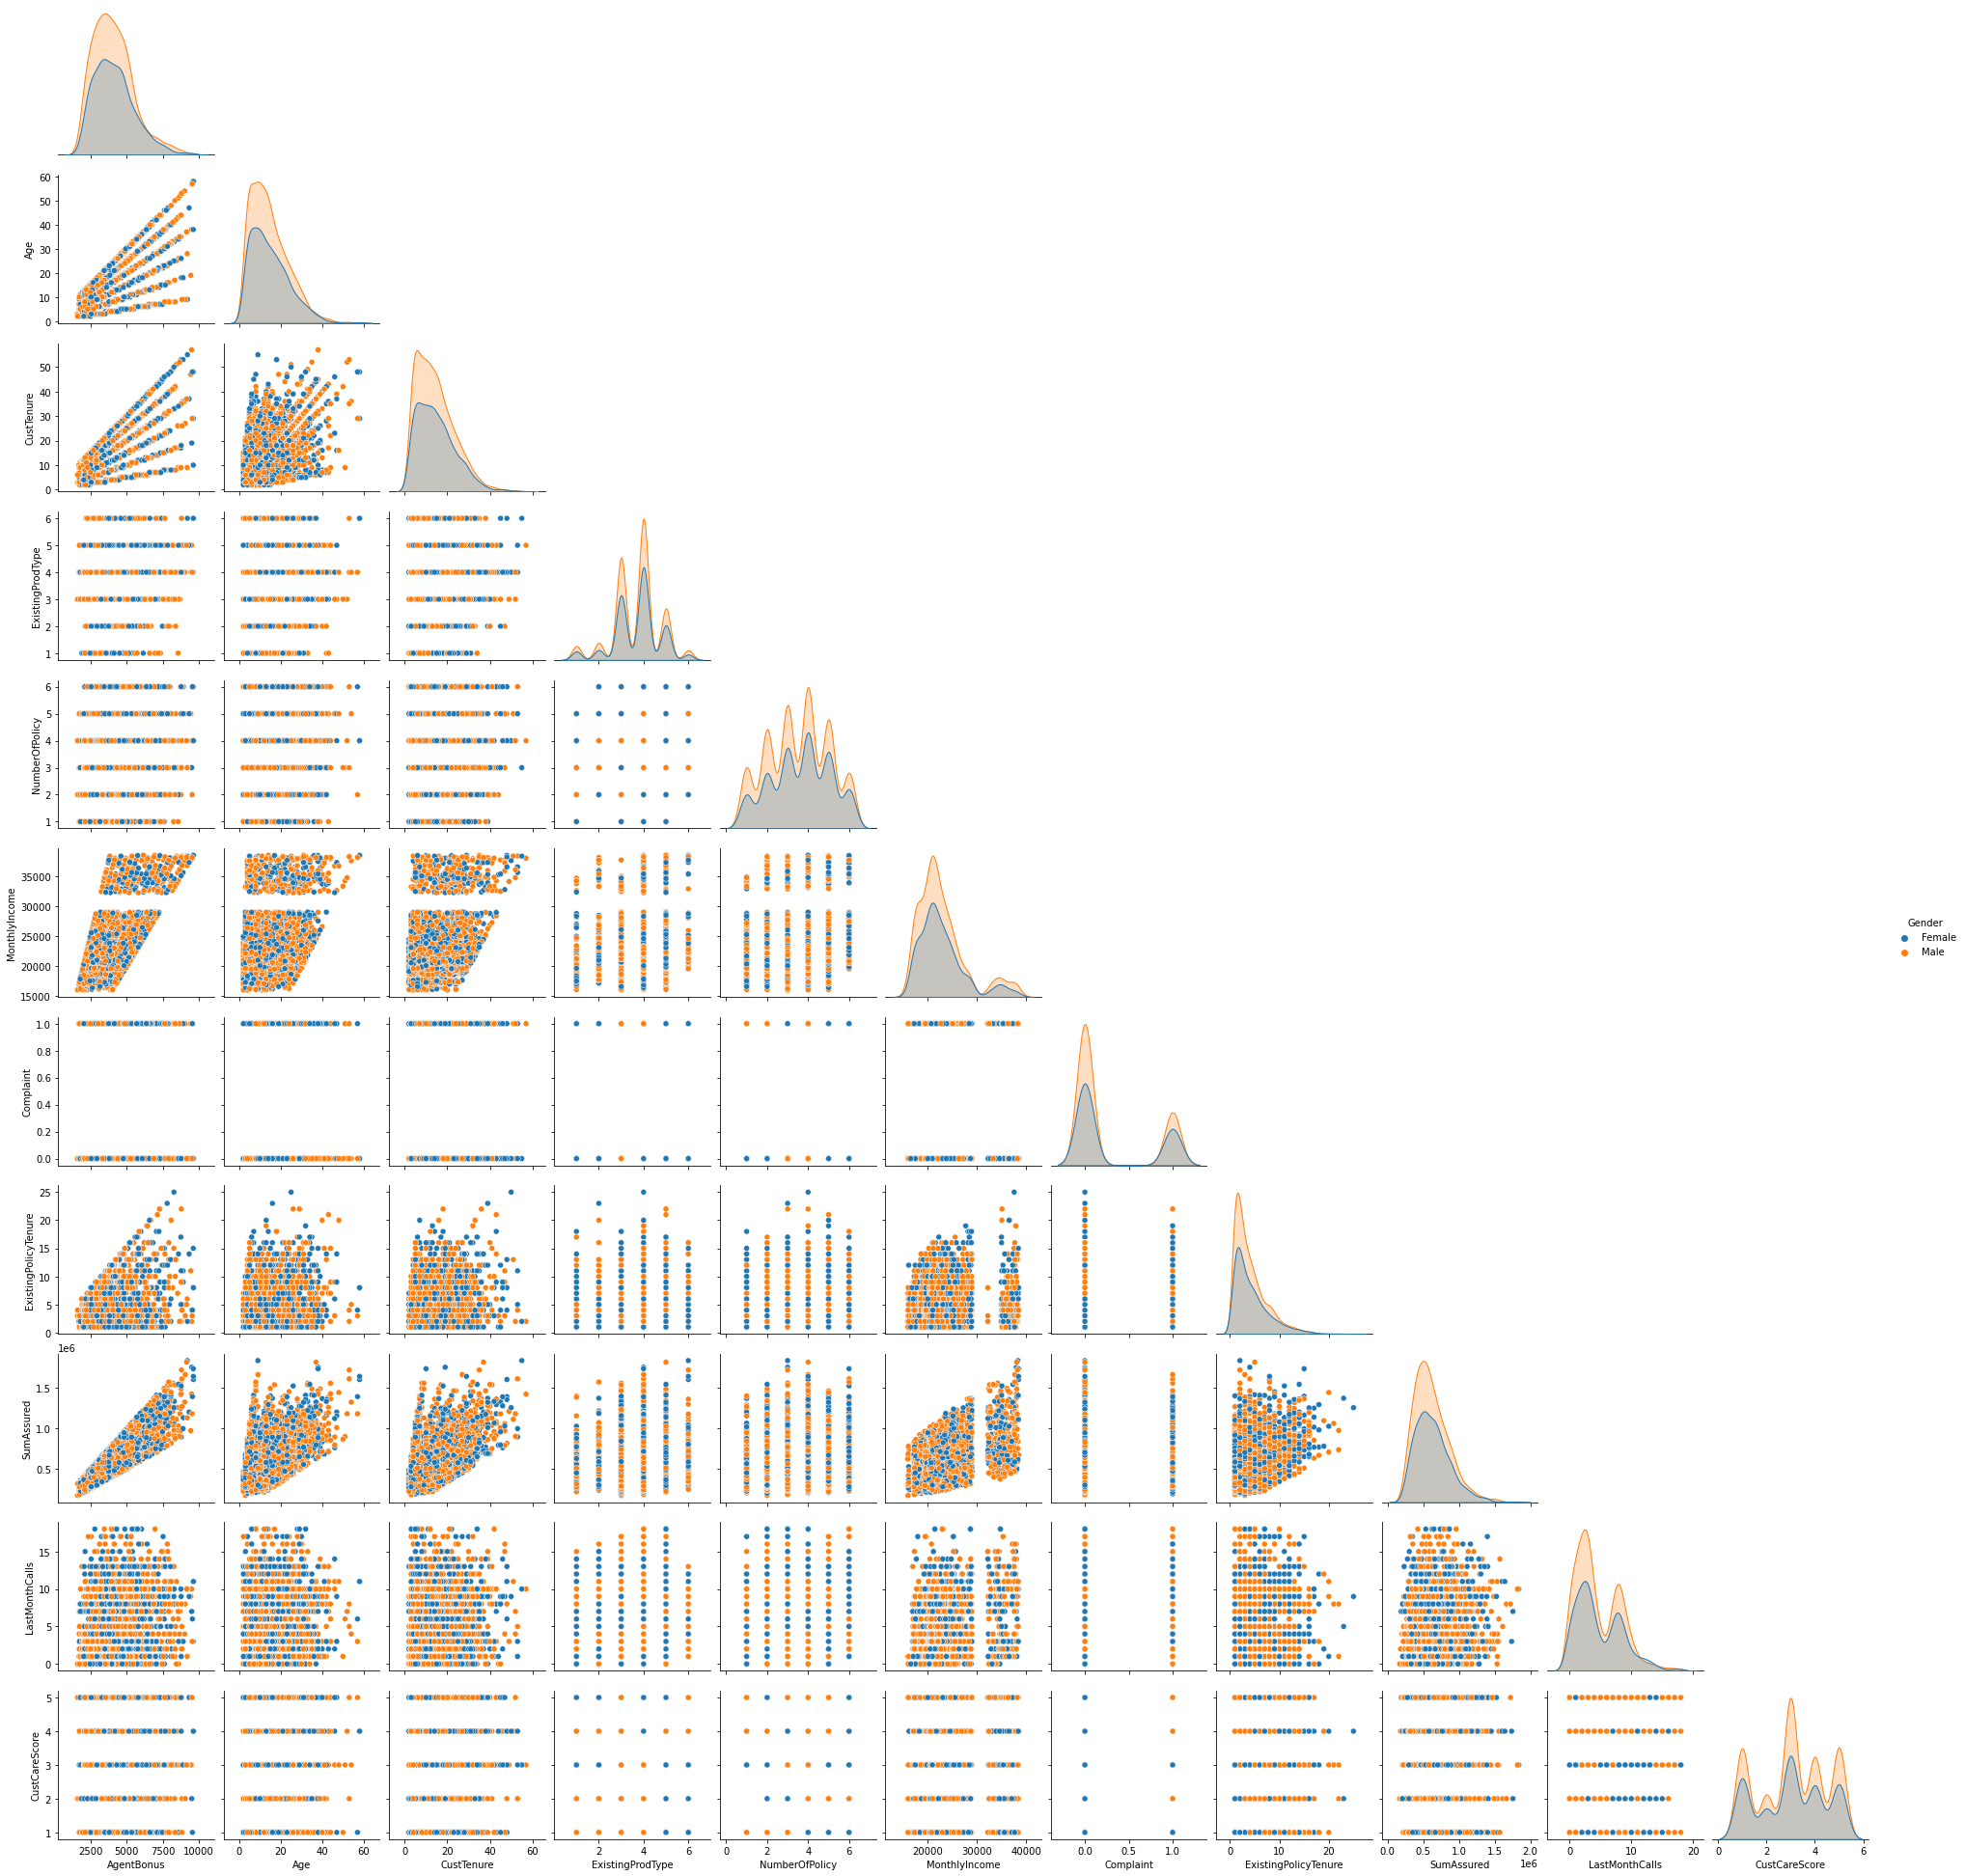

In [11]:
sns.pairplot(sales_df.iloc[:, 1:], corner= True, hue = 'Gender')
plt.show()

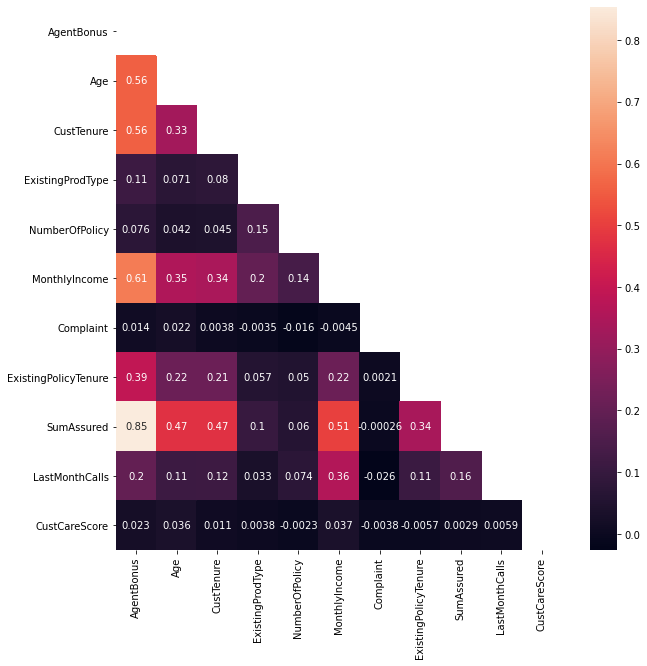

In [12]:
plt.figure(figsize= (10,10))
mask = np.zeros_like(sales_df.iloc[:, 1:].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(sales_df.iloc[:, 1:].corr(), annot = True, mask = mask)
plt.show()

Top 5 strong correlations:

- SumAssured & AgentBonus
- MonthlyIncome & AgentBonus
- CustTenure & AgentBonus
- Age & AgentBonus
- MonthlyIncome & SumAssured

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


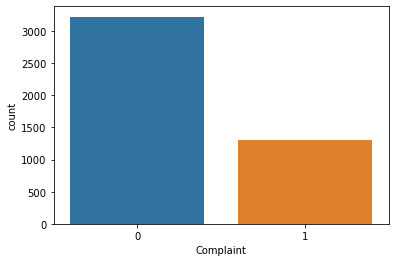

0    0.712832
1    0.287168
Name: Complaint, dtype: float64


In [13]:
sns.countplot(sales_df.Complaint)
plt.show()
print(sales_df.Complaint.value_counts(normalize = True))

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


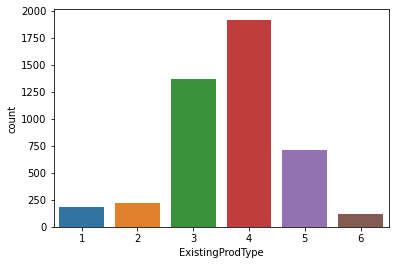

4    0.423894
3    0.302876
5    0.156637
2    0.048894
1    0.040487
6    0.027212
Name: ExistingProdType, dtype: float64


In [14]:
sns.countplot(sales_df.ExistingProdType)
plt.show()
print(sales_df.ExistingProdType.value_counts(normalize = True))

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


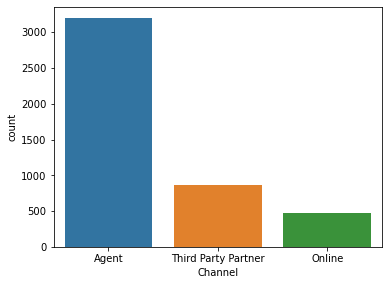

Agent                  0.706637
Third Party Partner    0.189823
Online                 0.103540
Name: Channel, dtype: float64


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


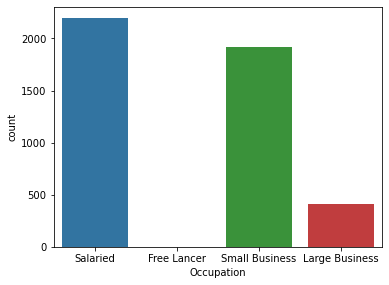

Salaried          0.484956
Small Business    0.424336
Large Business    0.090265
Free Lancer       0.000442
Name: Occupation, dtype: float64


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


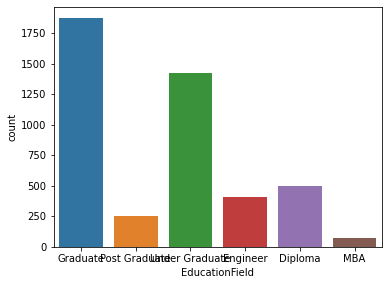

Graduate          0.413717
Under Graduate    0.314159
Diploma           0.109735
Engineer          0.090265
Post Graduate     0.055752
MBA               0.016372
Name: EducationField, dtype: float64


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


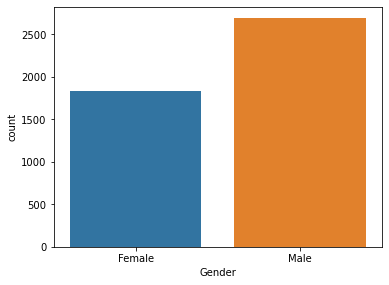

Male      0.59469
Female    0.40531
Name: Gender, dtype: float64


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


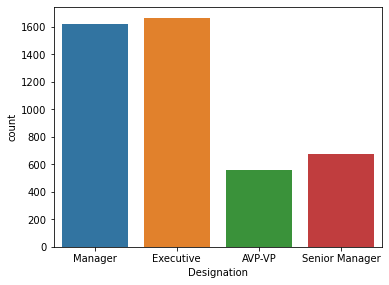

Executive         0.367699
Manager           0.358407
Senior Manager    0.149558
AVP-VP            0.124336
Name: Designation, dtype: float64


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


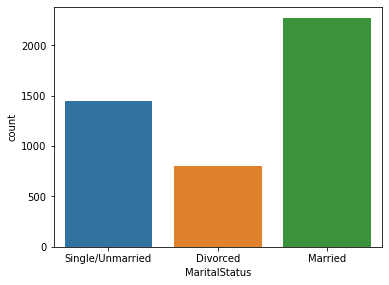

Married             0.501770
Single/Unmarried    0.320354
Divorced            0.177876
Name: MaritalStatus, dtype: float64


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


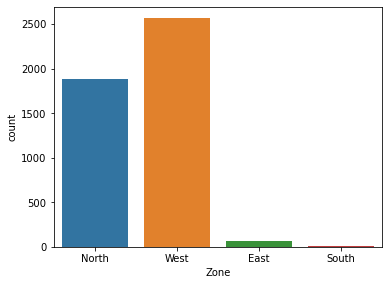

West     0.567699
North    0.416814
East     0.014159
South    0.001327
Name: Zone, dtype: float64


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


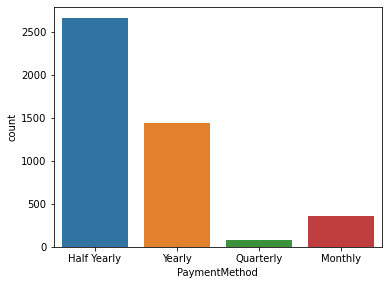

Half Yearly    0.587611
Yearly         0.317257
Monthly        0.078319
Quarterly      0.016814
Name: PaymentMethod, dtype: float64


In [15]:
i= 1

for col in sales_df.columns:
    if(sales_df[col].dtype == 'object'):
        fig = plt.figure(figsize= (20,15))
        ax = plt.subplot(3,3, i)
        sns.countplot(sales_df[col], ax = ax,linewidth=10)
        plt.show()
        print(sales_df[col].value_counts(normalize= True))
        i = i+1

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome

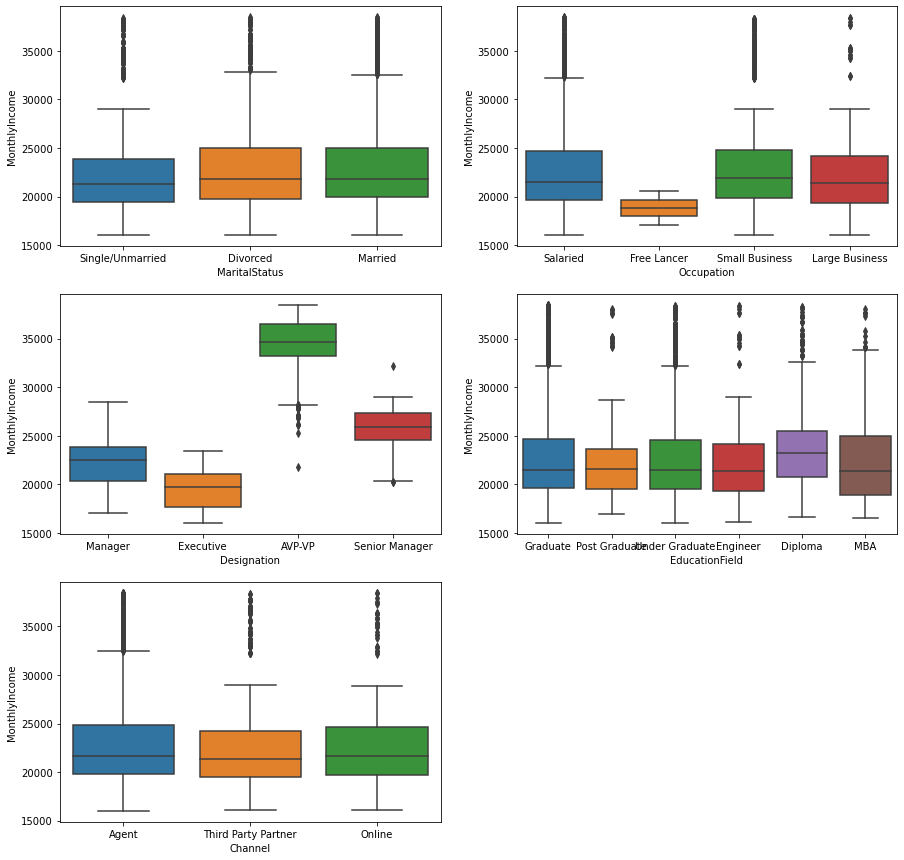

In [16]:
#relation between MonthlyIncome & categorical variables
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.boxplot(sales_df.MaritalStatus, sales_df.MonthlyIncome)
plt.subplot(3,2,2)
sns.boxplot(sales_df.Occupation, sales_df.MonthlyIncome)
plt.subplot(3,2,3)
sns.boxplot(sales_df.Designation, sales_df.MonthlyIncome)
plt.subplot(3,2,4)
sns.boxplot(sales_df.EducationField, sales_df.MonthlyIncome)
plt.subplot(3,2,5)
sns.boxplot(sales_df.Channel, sales_df.MonthlyIncome)
plt.show()

Customer Designation creates clear groups for MonthlyIncome of the customer so Missing Values in MonthlyIncome will be filled considering means of every group

# Missing Value Imputation

In [17]:
#substituting Missing values for MonthlyIncome
sales_df.groupby('Designation').mean()['MonthlyIncome']

Designation
AVP-VP            34377.114416
Executive         19509.678099
Manager           22228.965432
Senior Manager    25846.513274
Name: MonthlyIncome, dtype: float64

In [18]:
np.where(sales_df.Designation == 'AVP-VP', sales_df.MonthlyIncome, sales_df.MonthlyIncome.fillna(34377.1, inplace = True))

np.where(sales_df.Designation == 'Senior Manager', sales_df.MonthlyIncome, sales_df.MonthlyIncome.fillna(25846.5, inplace = True))

array([None, None, None, ..., None, None, None], dtype=object)

In [20]:
#Mean value imputation for missing values
sales_df.ExistingPolicyTenure.fillna(sales_df.ExistingPolicyTenure.mean(), inplace=True)
sales_df.SumAssured.fillna(sales_df.SumAssured.mean(), inplace=True)
sales_df.Age.fillna(sales_df.Age.mean(), inplace=True)
sales_df.CustTenure.fillna(sales_df.CustTenure.mean(), inplace=True)

In [21]:
#Mode value imputation for missing values
sales_df.NumberOfPolicy.fillna(4, inplace=True)
sales_df.CustCareScore.fillna(3, inplace=True)

In [22]:
sales_df.isna().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome

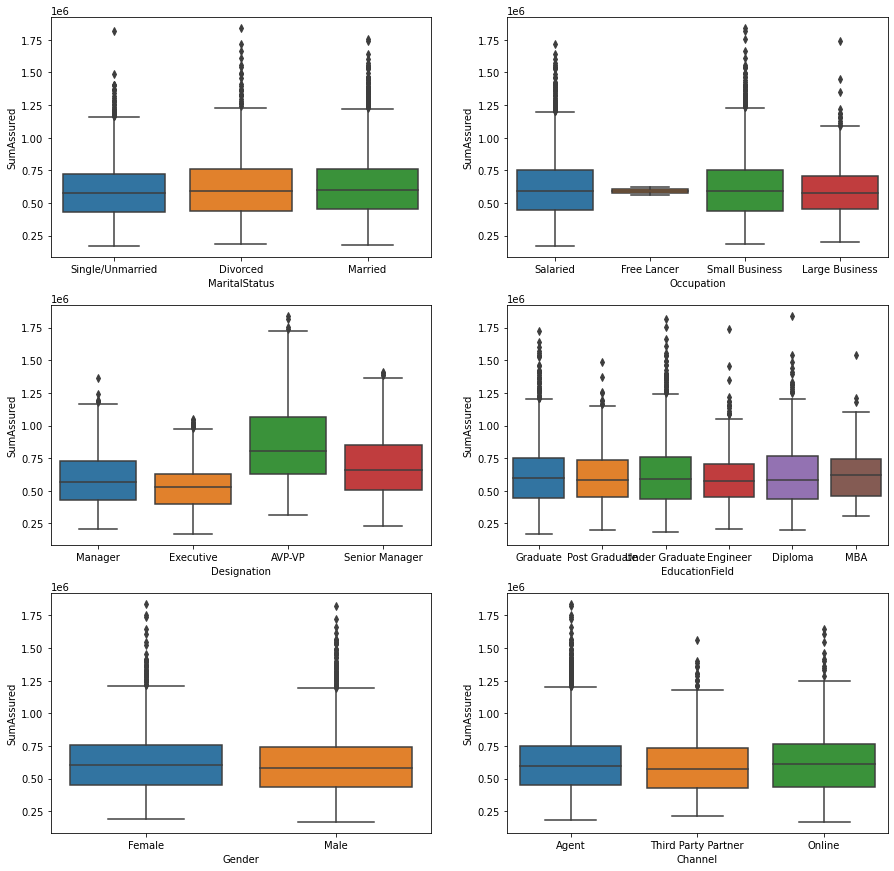

In [23]:
#relation between SumAssured & categorical variables
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.boxplot(sales_df.MaritalStatus, sales_df.SumAssured)
plt.subplot(3,2,2)
sns.boxplot(sales_df.Occupation, sales_df.SumAssured)
plt.subplot(3,2,3)
sns.boxplot(sales_df.Designation, sales_df.SumAssured)
plt.subplot(3,2,4)
sns.boxplot(sales_df.EducationField, sales_df.SumAssured)
plt.subplot(3,2,5)
sns.boxplot(sales_df.Gender, sales_df.SumAssured)
plt.subplot(3,2,6)
sns.boxplot(sales_df.Channel, sales_df.SumAssured)
plt.show()

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome

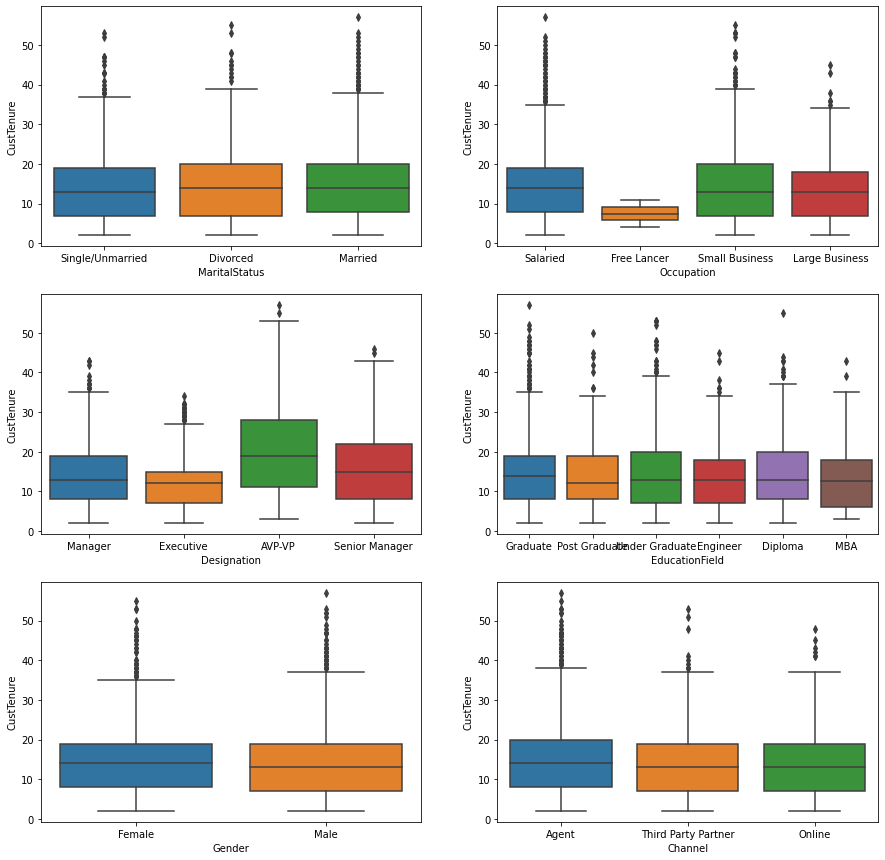

In [24]:
#relation between CustTenure & categorical variables
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.boxplot(sales_df.MaritalStatus, sales_df.CustTenure)
plt.subplot(3,2,2)
sns.boxplot(sales_df.Occupation, sales_df.CustTenure)
plt.subplot(3,2,3)
sns.boxplot(sales_df.Designation, sales_df.CustTenure)
plt.subplot(3,2,4)
sns.boxplot(sales_df.EducationField, sales_df.CustTenure)
plt.subplot(3,2,5)
sns.boxplot(sales_df.Gender, sales_df.CustTenure)
plt.subplot(3,2,6)
sns.boxplot(sales_df.Channel, sales_df.CustTenure)
plt.show()

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


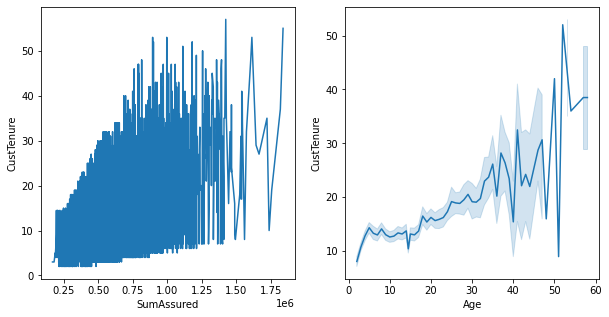

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.lineplot(sales_df.SumAssured, sales_df.CustTenure)
plt.subplot(1,2,2)
sns.lineplot(sales_df.Age, sales_df.CustTenure)
plt.show()

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome

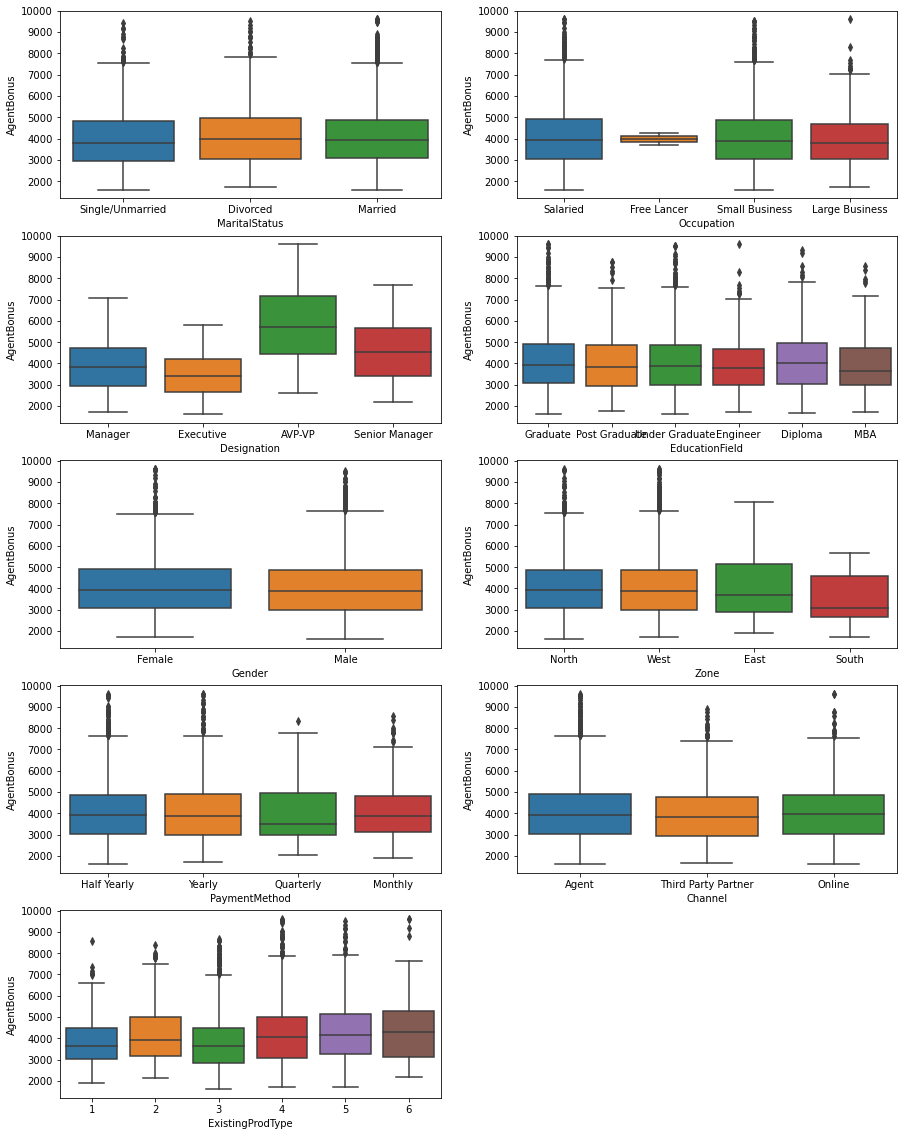

In [26]:
#relation between AgentBonus & categorical variables
plt.figure(figsize=(15,20))
plt.subplot(5,2,1)
sns.boxplot(sales_df.MaritalStatus, sales_df.AgentBonus)
plt.subplot(5,2,2)
sns.boxplot(sales_df.Occupation, sales_df.AgentBonus)
plt.subplot(5,2,3)
sns.boxplot(sales_df.Designation, sales_df.AgentBonus)
plt.subplot(5,2,4)
sns.boxplot(sales_df.EducationField, sales_df.AgentBonus)
plt.subplot(5,2,5)
sns.boxplot(sales_df.Gender, sales_df.AgentBonus)
plt.subplot(5,2,6)
sns.boxplot(sales_df.Zone, sales_df.AgentBonus)
plt.subplot(5,2,7)
sns.boxplot(sales_df.PaymentMethod, sales_df.AgentBonus)
plt.subplot(5,2,8)
sns.boxplot(sales_df.Channel, sales_df.AgentBonus)
plt.subplot(5,2,9)
sns.boxplot(sales_df.ExistingProdType, sales_df.AgentBonus)
plt.show()

The dependent variable AgentBonus show some variation with Designation from above Boxplots, but doesn't seem to show any relationship otherwise with other categorical variable. We will test it further with ANOVA

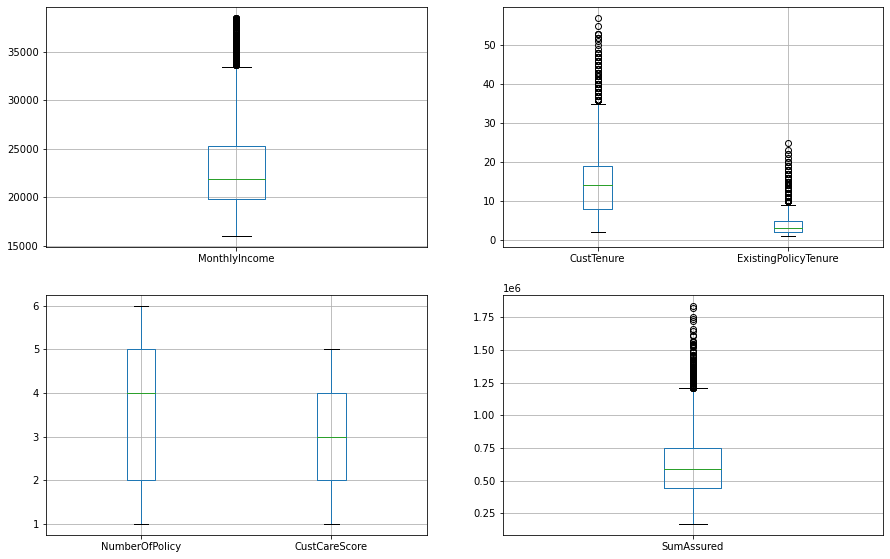

In [27]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sales_df.boxplot(['MonthlyIncome'])
plt.subplot(3,2,2)
sales_df.boxplot(['CustTenure', 'ExistingPolicyTenure'])
plt.subplot(3,2,3)
sales_df.boxplot(['NumberOfPolicy', 'CustCareScore'])
plt.subplot(3,2,4)
sales_df.boxplot(['SumAssured'])
plt.show()

In [28]:
#remove outliers
def remove_outliers(col):
    upper = sales_df[col].quantile(0.75)
    lower = sales_df[col].quantile(0.25) 
    IQR = sales_df[col].quantile(0.75) - sales_df[col].quantile(0.25) 
    sales_df[col] = np.where(sales_df[col] < (lower - 1.5*IQR) , (lower - 1.5*IQR), sales_df[col])
    sales_df[col] = np.where(sales_df[col] > (lower + 1.5*IQR) , (lower + 1.5*IQR), sales_df[col])

In [29]:
remove_outliers('MonthlyIncome') 
remove_outliers('CustTenure') 
remove_outliers('ExistingPolicyTenure') 
remove_outliers('SumAssured')

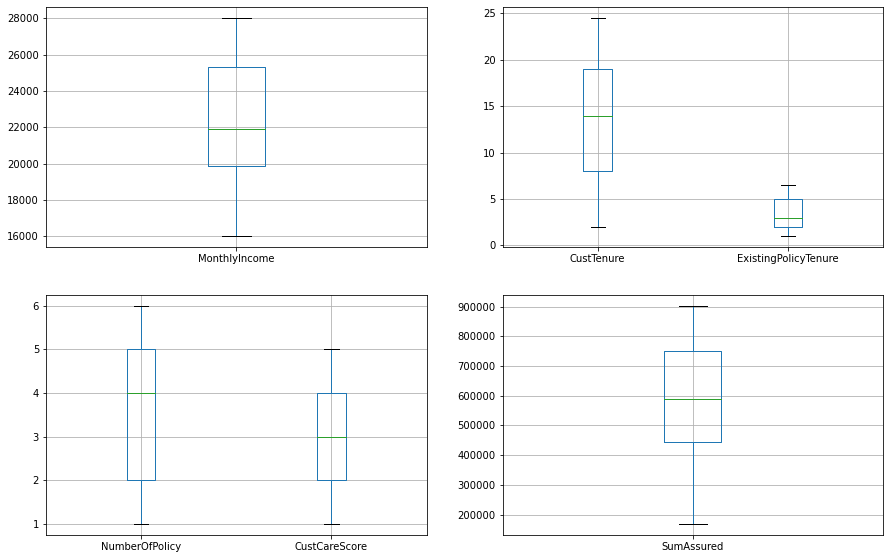

In [30]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sales_df.boxplot(['MonthlyIncome'])
plt.subplot(3,2,2)
sales_df.boxplot(['CustTenure', 'ExistingPolicyTenure'])
plt.subplot(3,2,3)
sales_df.boxplot(['NumberOfPolicy', 'CustCareScore'])
plt.subplot(3,2,4)
sales_df.boxplot(['SumAssured'])
plt.show()

# Shapiro-wilk to test the normality of the continues variables

H0- Data is normal H1 - Data is not normal

In [31]:
t, p = stats.shapiro(sales_df['AgentBonus'])
t1, p1 = stats.shapiro(stats.zscore(sales_df['AgentBonus']))
print(t," ", p)
print(t1," ", p1)  

0.9570314884185791   1.4187508533160892e-34
0.9570330381393433   1.4203979229396827e-34


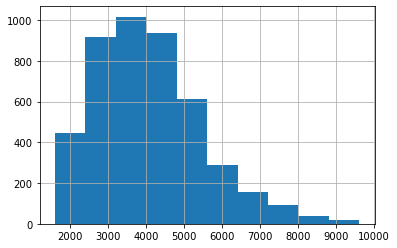

In [32]:
sales_df['AgentBonus'].hist()
plt.show()

(array([ 69., 276., 480., 634., 824., 904., 745., 355., 177.,  56.]),
 array([7.38087904, 7.55982627, 7.7387735 , 7.91772073, 8.09666797,
        8.2756152 , 8.45456243, 8.63350967, 8.8124569 , 8.99140413,
        9.17035136]),
 <BarContainer object of 10 artists>)

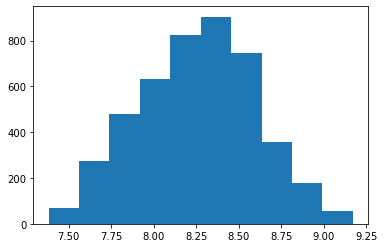

In [33]:
sales_df_ANNOVA = sales_df.copy()

sales_df_ANNOVA['AgentBonus'] = stats.boxcox(sales_df_ANNOVA['AgentBonus'], lmbda = 0)

plt.hist(sales_df_ANNOVA['AgentBonus'])

In [34]:
t, p = stats.shapiro(sales_df_ANNOVA['AgentBonus'])
print(t ,", ", p)

0.9950266480445862 ,  2.562266371297639e-11


The dependent variable was tried to convert into a normal distribution, however the results were still unsuccessful. It will be assumed Normal for further ANNOVA test

# ANNOVA

In [35]:
formula = 'AgentBonus ~ C(Channel)+ C(Occupation) + C(LastMonthCalls) +C(Complaint) + C(ExistingProdType) + C(MaritalStatus) + C(EducationField) + C(NumberOfPolicy)+ C(Zone)+ C(CustCareScore) + C(Gender) + C(Designation)'
model = ols(formula, sales_df_ANNOVA).fit()
aov_table = anova_lm(model)
print(aov_table)

                         df      sum_sq    mean_sq           F         PR(>F)
C(Channel)              2.0    0.747771   0.373886    4.462671   1.158297e-02
C(Occupation)           3.0    0.482862   0.160954    1.921135   1.238708e-01
C(LastMonthCalls)      18.0   32.956076   1.830893   21.853413   4.098847e-69
C(Complaint)            1.0    0.148066   0.148066    1.767308   1.837835e-01
C(ExistingProdType)     5.0    4.363999   0.872800   10.417678   5.916756e-10
C(MaritalStatus)        2.0    1.039424   0.519712    6.203244   2.040326e-03
C(EducationField)       5.0    0.122326   0.024465    0.292015   9.176025e-01
C(NumberOfPolicy)       5.0    1.638901   0.327780    3.912362   1.533478e-03
C(Zone)                 3.0    0.302482   0.100827    1.203467   3.068547e-01
C(CustCareScore)        4.0    0.603304   0.150826    1.800248   1.258464e-01
C(Gender)               1.0    0.390978   0.390978    4.666682   3.080631e-02
C(Designation)          3.0  106.997424  35.665808  425.704600  

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.38
Date:                Sun, 26 Dec 2021   Prob (F-statistic):          2.89e-282
Time:                        15:35:11   Log-Likelihood:                -783.16
No. Observations:                4520   AIC:                             1672.
Df Residuals:                    4467   BIC:                             2012.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                8.5897      0.215     39.886      0.000       8.167       9.012
C(Channel)[T.Online]                    -0.0011      0.015     -0.076      0.940      -0.030       0.027
C(Channel)[T.Third Party Partner]       -0.0149      0.011     -1.319      0.187      -0.037       0.007
C(Occupation)[T.Large Business]         -0.1207      0.215     -0.561      0.575      -0.543       0.301
C(Occupation)[T.Salaried]               -0.1602      0.206     -0.777      0.437      -0.565       0.244
C(Occupation)[T.Small Business]         -0.1426      0.209     -0.682      0.496      -0.553       0.268
C(LastMonthCalls)[T.1]                   0.0723      0.020      3.659      0.000       0.034       0.111
C(LastMonthCalls)[T.2]                   0.0201      0.018      1.090      0.276      -0.016       0.056
C(LastMonthCalls)[T.3]                   0.0832      0.019      4.476      0.000       0.047       0.120
C(LastMonthCalls)[T.4]                   0.0375      0.022      1.739      0.082      -0.005       0.080
C(LastMonthCalls)[T.5]                   0.1132      0.026      4.407      0.000       0.063       0.164
C(LastMonthCalls)[T.6]                   0.1084      0.033      3.270      0.001       0.043       0.173
C(LastMonthCalls)[T.7]                   0.0064      0.021      0.302      0.763      -0.035       0.048
C(LastMonthCalls)[T.8]                   0.0442      0.020      2.188      0.029       0.005       0.084
C(LastMonthCalls)[T.9]                   0.0848      0.024      3.561      0.000       0.038       0.132
C(LastMonthCalls)[T.10]                  0.0515      0.029      1.756      0.079      -0.006       0.109
C(LastMonthCalls)[T.11]                  0.0749      0.037      2.022      0.043       0.002       0.147
C(LastMonthCalls)[T.12]                  0.0329      0.041      0.808      0.419      -0.047       0.113
C(LastMonthCalls)[T.13]                  0.0691      0.044      1.574      0.116      -0.017       0.155
C(LastMonthCalls)[T.14]                  0.0670      0.056      1.203      0.229      -0.042       0.176
C(LastMonthCalls)[T.15]                 -0.0338      0.079     -0.426      0.670      -0.189       0.122
C(LastMonthCalls)[T.16]                  0.0002      0.094      0.003      0.998      -0.183       0.184
C(LastMonthCalls)[T.17]                  0.0004      0.077      0.006      0.996      -0.150       0.151
C(LastMonthCalls)[T.18]                  0.1549      0.086      1.811      0.070      -0.013       0.323
C(Complaint)[T.1]                        0.0092      0.010      0.962      0.336      -0.010       0.028
C(ExistingProdType)[T.2]                 0.0585      0.030      1.977      0.048       0.000       0.117
C(ExistingProdType)[T.3]              

In [37]:
formula1 = 'AgentBonus ~ MonthlyIncome + CustTenure + SumAssured + ExistingPolicyTenure + Age'
model1 = ols(formula1, sales_df_ANNOVA).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     3053.
Date:                Sun, 26 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:35:29   Log-Likelihood:                 1795.1
No. Observations:                4520   AIC:                            -3578.
Df Residuals:                    4514   BIC:                            -3540.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.9569      0.016    443.076      0.000       6.926       6.988
MonthlyIncome         2.034e-05   7.66e-07     26.555      0.000    1.88e-05    2.18e-05
CustTenure               0.0067      0.000     17.539      0.000       0.006       0.007
SumAssured            1.024e-06   1.57e-08     65.127      0.000    9.94e-07    1.06e-06
ExistingPolicyTenure     0.0136      0.001     10.815      0.000       0.011       0.016
Age                      0.0062      0.000     19.750      0.000       0.006       0.007
==============================================================================
Omnibus:                        2.332   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                2.367
Skew:                           0.046   Prob(JB):                        0.306
Kurtosis:                       2.935   Cond. No.                     4.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
sales_df['Age'] = pd.cut(sales_df.Age, 3, labels = ['1-20', '21-39', '40-60'])

sales_df.Age.unique()

['21-39', '1-20', '40-60']
Categories (3, object): ['1-20' < '21-39' < '40-60']

In [39]:
#encoding categorical variables
encoded_df = sales_df.copy()

encoded_df['Age'] = pd.Categorical(encoded_df['Age']).codes
encoded_df['Age'].unique()

array([1, 0, 2], dtype=int8)

In [40]:
#encoding categorical variables
for col in encoded_df:
    if encoded_df[col].dtype == 'object':
        encoded_df[col] = pd.Categorical(encoded_df[col]).codes
        print(col, ": ", encoded_df[col].unique())

Channel :  [0 2 1]
Occupation :  [2 0 3 1]
EducationField :  [2 4 5 1 0 3]
Gender :  [0 1]
Designation :  [2 1 0 3]
MaritalStatus :  [2 0 1]
Zone :  [1 3 0 2]
PaymentMethod :  [0 3 2 1]


In [41]:
encoded_df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,1,4.000000,0,2,2,0,3,2,2.0,2,20993.0,1,2.0,806761.000000,1,0,5,2.0
1,7000001,2214,0,2.000000,2,2,2,1,4,2,4.0,0,20130.0,0,3.0,294502.000000,1,3,7,3.0
2,7000002,4273,1,4.000000,0,0,4,1,4,1,3.0,2,17090.0,1,2.0,619999.699267,1,3,0,3.0
3,7000003,1791,0,14.469027,2,2,2,0,3,1,3.0,0,17909.0,1,2.0,268635.000000,3,0,0,5.0
4,7000004,2955,0,14.469027,0,3,5,1,3,1,4.0,0,18468.0,0,4.0,366405.000000,3,0,2,5.0


In [42]:
#zscore scaling
from scipy.stats import zscore
sales_df_scaled = encoded_df.iloc[:, 1:].apply(zscore)
sales_df_scaled.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,0.236010,1.711655,-1.378167,-0.609065,-0.523319,-0.437870,-1.211301,-0.678318,0.522998,-1.083186,1.240404,-0.431077,1.575525,-0.753507,1.083047,-1.108182,-0.777993,0.103049,-0.775947
1,-1.328309,-0.519865,-1.664582,1.911973,-0.523319,-0.437870,0.825559,0.306267,0.522998,0.296941,-1.652592,-0.674583,-0.634709,-0.259936,-1.567258,-1.108182,1.416181,0.655576,-0.048597
2,0.139087,1.711655,-1.378167,-0.609065,-3.664625,0.713482,0.825559,0.306267,-0.597358,-0.393123,1.240404,-1.532354,1.575525,-0.753507,0.116789,-1.108182,1.416181,-1.278269,-0.048597
3,-1.629770,-0.519865,0.121077,1.911973,-0.523319,-0.437870,-1.211301,-0.678318,-0.597358,-0.393123,-1.652592,-1.301264,1.575525,-0.753507,-1.701087,0.866191,-0.777993,-1.278269,1.406102
4,-0.800217,-0.519865,0.121077,-0.609065,1.047333,1.289158,0.825559,-0.678318,-0.597358,0.296941,-1.652592,-1.143536,-0.634709,0.233634,-1.195249,0.866191,-0.777993,-0.725742,1.406102


# Custering

In [43]:
from sklearn.cluster import KMeans
wss = []

In [44]:
for j in range (1,11):
    km = KMeans(random_state = 111, n_clusters=j).fit(sales_df_scaled)
    wss.append(km.inertia_)

In [45]:
wss

[85880.00000000023,
 76220.24458786246,
 72152.83670812742,
 69390.5008559819,
 66808.48464330098,
 65268.89090621684,
 64077.749512616705,
 62777.56207706078,
 61704.63072514283,
 60906.99922904601]

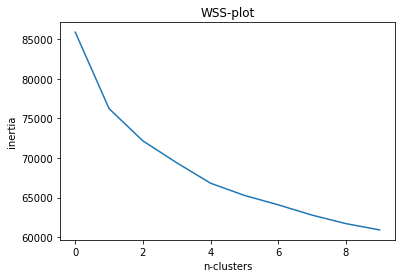

In [46]:
plt.plot(wss)
plt.xlabel('n-clusters')
plt.ylabel('inertia')
plt.title('WSS-plot')
plt.show()

We can see the elbow at 2 places cluster 1 and cluster 4

In [47]:
kmean = KMeans(random_state = 222, n_clusters=3).fit(sales_df_scaled)

In [48]:
kmean.labels_

array([1, 2, 2, ..., 0, 1, 1])

In [49]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(sales_df_scaled, kmean.labels_)

0.08330856477373955

In [50]:
sil_width = silhouette_samples(sales_df_scaled, kmean.labels_)
sales_df['SilWidth'] = sil_width
sales_df['Cluster'] = kmean.labels_
sales_df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,...,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,SilWidth,Cluster
0,7000000,4409,21-39,4.000000,Agent,Salaried,Graduate,Female,3,Manager,...,20993.0,1,2.0,806761.000000,North,Half Yearly,5,2.0,0.073427,1
1,7000001,2214,1-20,2.000000,Third Party Partner,Salaried,Graduate,Male,4,Manager,...,20130.0,0,3.0,294502.000000,North,Yearly,7,3.0,0.040148,2
2,7000002,4273,21-39,4.000000,Agent,Free Lancer,Post Graduate,Male,4,Executive,...,17090.0,1,2.0,619999.699267,North,Yearly,0,3.0,0.050278,2
3,7000003,1791,1-20,14.469027,Third Party Partner,Salaried,Graduate,Female,3,Executive,...,17909.0,1,2.0,268635.000000,West,Half Yearly,0,5.0,0.111666,1
4,7000004,2955,1-20,14.469027,Agent,Small Business,Under Graduate,Male,3,Executive,...,18468.0,0,4.0,366405.000000,West,Half Yearly,2,5.0,0.137513,1


In [51]:
sales_df[sales_df['SilWidth'] <0]

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,...,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,SilWidth,Cluster
21,7000021,4981,1-20,24.5,Agent,Small Business,Diploma,Female,3,Senior Manager,...,22639.000,0,1.0,826776.000,West,Half Yearly,9,3.0,-0.008547,0
35,7000035,5235,1-20,10.0,Agent,Small Business,Diploma,Female,3,Manager,...,20940.000,0,6.5,738135.000,West,Half Yearly,5,4.0,-0.043352,0
82,7000082,5146,21-39,5.0,Agent,Small Business,Under Graduate,Male,4,Manager,...,20582.000,0,6.0,902777.625,North,Yearly,8,3.0,-0.001510,0
100,7000100,4738,21-39,24.5,Third Party Partner,Small Business,Under Graduate,Male,3,Manager,...,19741.000,1,5.0,578016.000,West,Half Yearly,3,3.0,-0.008009,0
111,7000111,3994,1-20,24.0,Third Party Partner,Small Business,Diploma,Female,3,AVP-VP,...,28006.375,0,5.0,443279.000,North,Half Yearly,8,3.0,-0.017478,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,7004447,5044,1-20,10.0,Agent,Salaried,Engineer,Male,2,Executive,...,21016.000,0,6.5,796927.000,North,Yearly,1,1.0,-0.005665,2
4461,7004461,4427,1-20,18.0,Third Party Partner,Small Business,Graduate,Female,5,Executive,...,21082.000,0,4.0,730491.000,North,Half Yearly,3,5.0,-0.049576,0
4504,7004504,4044,1-20,20.0,Agent,Large Business,Graduate,Male,4,Senior Manager,...,26957.000,0,5.0,784449.000,West,Yearly,7,5.0,-0.037633,0
4506,7004506,3835,1-20,15.0,Third Party Partner,Small Business,Diploma,Female,4,Manager,...,22560.000,0,6.5,713347.000,North,Half Yearly,8,3.0,-0.024548,0


We will consider 3 ultimate clusters as that is giving us very fewer negative silhouette widths than 4 clusters

Note: Positive silhouette width suggest that the observation belong to the correct cluster, negative would be opposite.

In [57]:
sales_df.groupby('Cluster').mean()

,CustID,AgentBonus,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,SilWidth
Cluster,,,,,,,,,,,,
0,7.002636e+06,5598.128727,18.596727,3.789091,3.841455,25619.695455,0.298182,4.512925,788822.765182,6.104727,3.114182,0.053366
1,7.002041e+06,3349.459113,11.190385,3.117734,3.395567,20960.395813,0.277833,3.052203,504027.790381,4.079310,3.068473,0.103034
2,7.002192e+06,3529.147982,11.920644,4.605381,3.551570,21540.073991,0.290583,3.174162,531443.433936,3.801794,3.005381,0.084321


In [58]:
sales_df.to_csv("AgentBonus.csv")

In [64]:
sales_df = pd.read_csv("AgentBonus.csv")

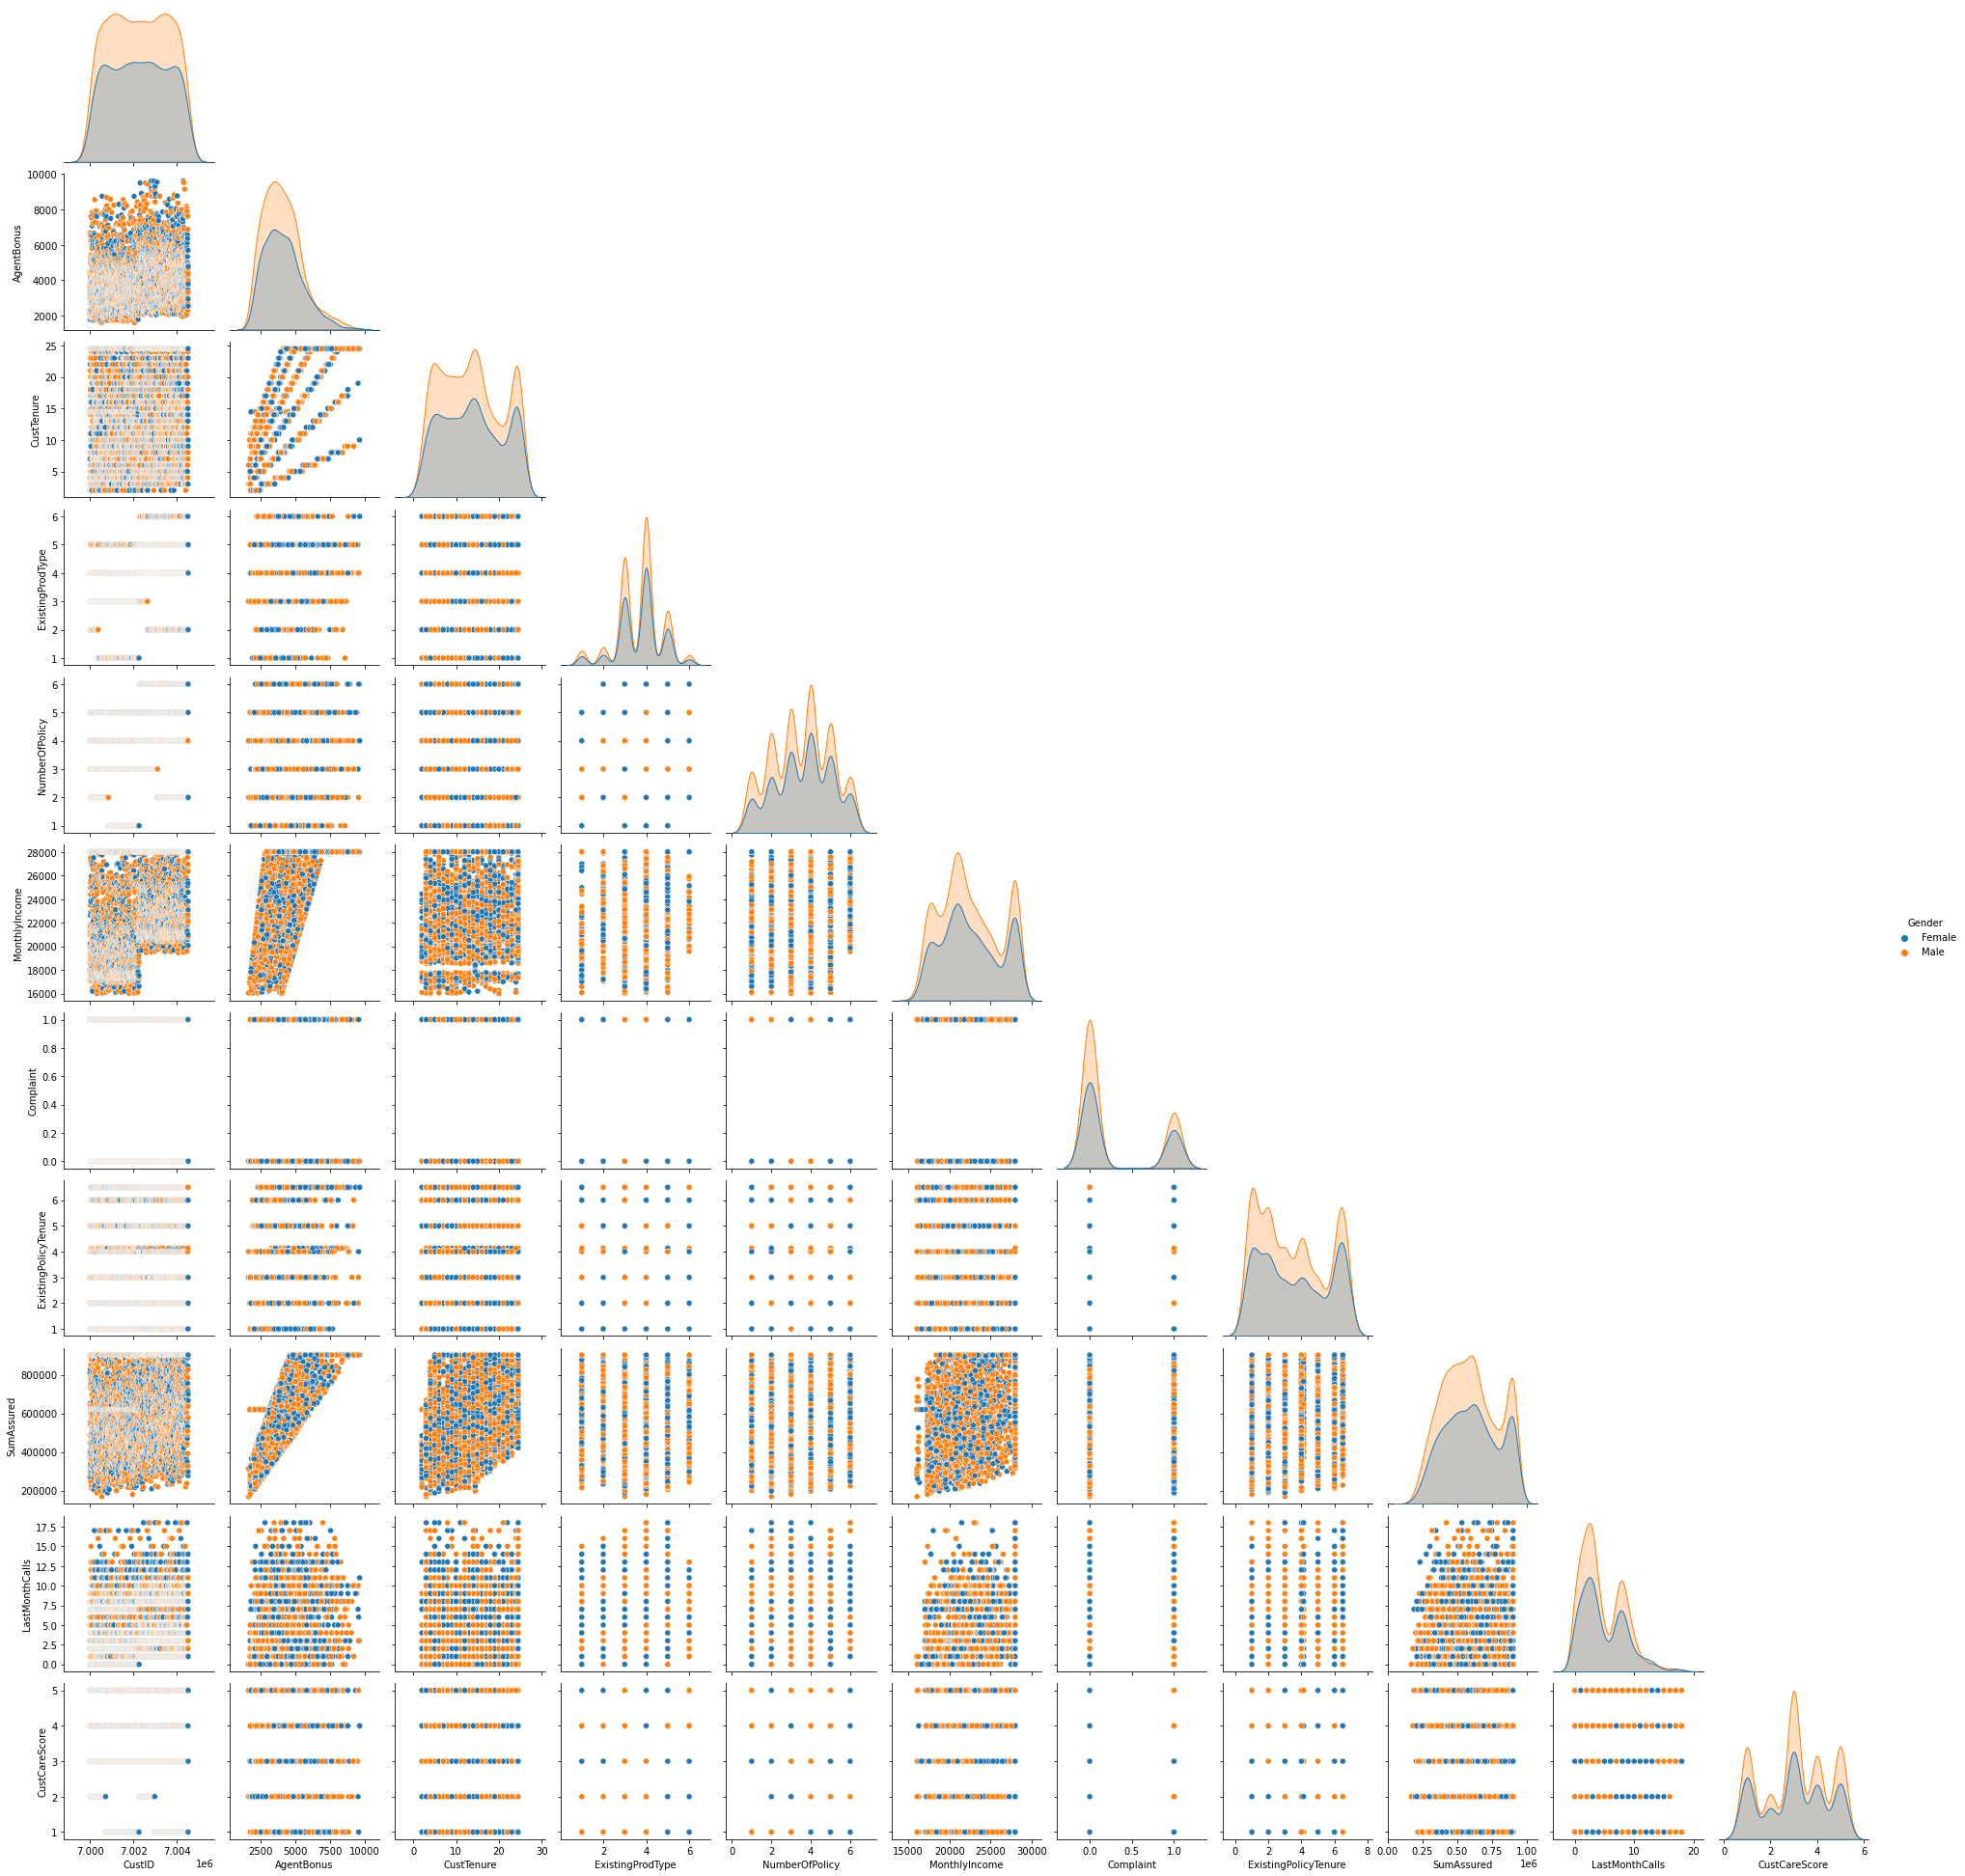

In [67]:
sns.pairplot(sales_df.iloc[:, 1:21], hue = 'Gender', corner = True)
plt.show()

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


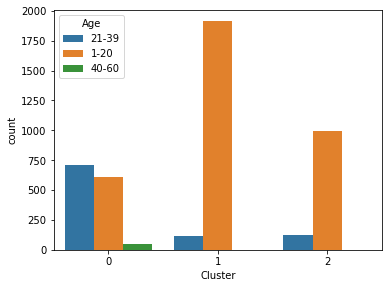

1-20     0.778097
21-39    0.210841
40-60    0.011062
Name: Age, dtype: float64


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


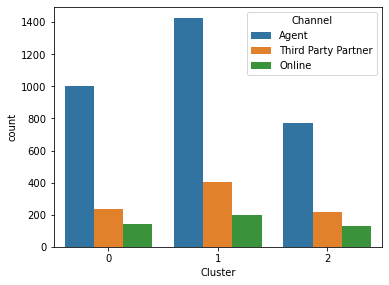

Agent                  0.706637
Third Party Partner    0.189823
Online                 0.103540
Name: Channel, dtype: float64


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


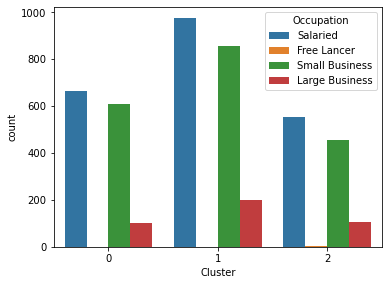

Salaried          0.484956
Small Business    0.424336
Large Business    0.090265
Free Lancer       0.000442
Name: Occupation, dtype: float64


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


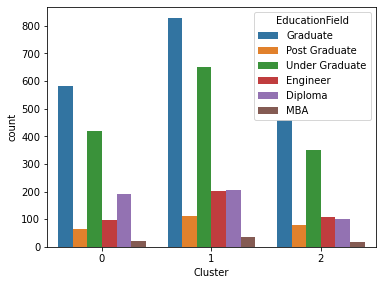

Graduate          0.413717
Under Graduate    0.314159
Diploma           0.109735
Engineer          0.090265
Post Graduate     0.055752
MBA               0.016372
Name: EducationField, dtype: float64


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


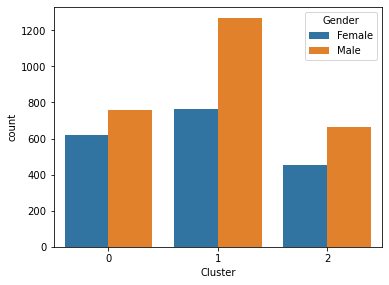

Male      0.59469
Female    0.40531
Name: Gender, dtype: float64


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


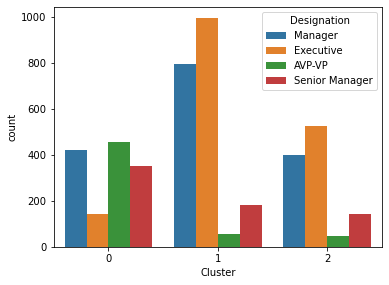

Executive         0.367699
Manager           0.358407
Senior Manager    0.149558
AVP-VP            0.124336
Name: Designation, dtype: float64


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


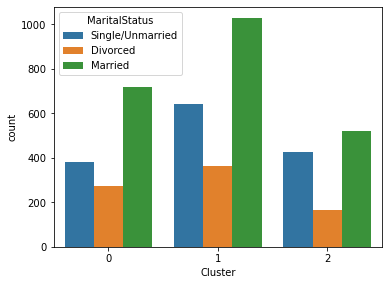

Married             0.501770
Single/Unmarried    0.320354
Divorced            0.177876
Name: MaritalStatus, dtype: float64


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


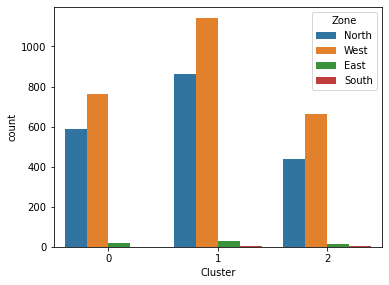

West     0.567699
North    0.416814
East     0.014159
South    0.001327
Name: Zone, dtype: float64


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


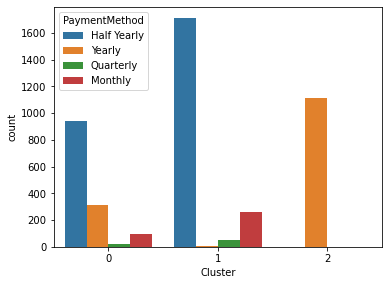

Half Yearly    0.587611
Yearly         0.317257
Monthly        0.078319
Quarterly      0.016814
Name: PaymentMethod, dtype: float64


In [68]:
i= 1

for col in sales_df.columns:
    if(sales_df[col].dtype == 'object'):
        fig = plt.figure(figsize= (20,15))
        ax = plt.subplot(3,3, i)
        sns.countplot('Cluster', hue = sales_df[col], ax = ax,linewidth=10, data = sales_df)
        plt.show()
        print(sales_df[col].value_counts(normalize= True))
        i = i+1

In [77]:
sales_df_encoded = sales_df.copy()
sales_df_encoded.head()

,Unnamed: 0,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,...,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,SilWidth,Cluster
0,0,7000000,4409,21-39,4.000000,Agent,Salaried,Graduate,Female,3,...,20993.0,1,2.0,806761.000000,North,Half Yearly,5,2.0,0.073427,1
1,1,7000001,2214,1-20,2.000000,Third Party Partner,Salaried,Graduate,Male,4,...,20130.0,0,3.0,294502.000000,North,Yearly,7,3.0,0.040148,2
2,2,7000002,4273,21-39,4.000000,Agent,Free Lancer,Post Graduate,Male,4,...,17090.0,1,2.0,619999.699267,North,Yearly,0,3.0,0.050278,2
3,3,7000003,1791,1-20,14.469027,Third Party Partner,Salaried,Graduate,Female,3,...,17909.0,1,2.0,268635.000000,West,Half Yearly,0,5.0,0.111666,1
4,4,7000004,2955,1-20,14.469027,Agent,Small Business,Under Graduate,Male,3,...,18468.0,0,4.0,366405.000000,West,Half Yearly,2,5.0,0.137513,1


In [80]:
for col in sales_df_encoded.columns:
    if (sales_df_encoded[col].dtypes == 'object'):
        sales_df_encoded = pd.get_dummies(sales_df_encoded, columns = [col], drop_first=True)

In [78]:
sales_df_encoded.head()

,Unnamed: 0,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,...,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,SilWidth,Cluster
0,0,7000000,4409,21-39,4.000000,Agent,Salaried,Graduate,Female,3,...,20993.0,1,2.0,806761.000000,North,Half Yearly,5,2.0,0.073427,1
1,1,7000001,2214,1-20,2.000000,Third Party Partner,Salaried,Graduate,Male,4,...,20130.0,0,3.0,294502.000000,North,Yearly,7,3.0,0.040148,2
2,2,7000002,4273,21-39,4.000000,Agent,Free Lancer,Post Graduate,Male,4,...,17090.0,1,2.0,619999.699267,North,Yearly,0,3.0,0.050278,2
3,3,7000003,1791,1-20,14.469027,Third Party Partner,Salaried,Graduate,Female,3,...,17909.0,1,2.0,268635.000000,West,Half Yearly,0,5.0,0.111666,1
4,4,7000004,2955,1-20,14.469027,Agent,Small Business,Under Graduate,Male,3,...,18468.0,0,4.0,366405.000000,West,Half Yearly,2,5.0,0.137513,1


In [79]:
sales_df_encoded = pd.get_dummies(sales_df_encoded, columns = ['Age', 'ExistingProdType'], drop_first=True)
sales_df_encoded.head()

,Unnamed: 0,CustID,AgentBonus,CustTenure,Channel,Occupation,EducationField,Gender,Designation,NumberOfPolicy,...,CustCareScore,SilWidth,Cluster,Age_21-39,Age_40-60,ExistingProdType_2,ExistingProdType_3,ExistingProdType_4,ExistingProdType_5,ExistingProdType_6
0,0,7000000,4409,4.000000,Agent,Salaried,Graduate,Female,Manager,2.0,...,2.0,0.073427,1,1,0,0,1,0,0,0
1,1,7000001,2214,2.000000,Third Party Partner,Salaried,Graduate,Male,Manager,4.0,...,3.0,0.040148,2,0,0,0,0,1,0,0
2,2,7000002,4273,4.000000,Agent,Free Lancer,Post Graduate,Male,Executive,3.0,...,3.0,0.050278,2,1,0,0,0,1,0,0
3,3,7000003,1791,14.469027,Third Party Partner,Salaried,Graduate,Female,Executive,3.0,...,5.0,0.111666,1,0,0,0,1,0,0,0
4,4,7000004,2955,14.469027,Agent,Small Business,Under Graduate,Male,Executive,4.0,...,5.0,0.137513,1,0,0,0,1,0,0,0


In [81]:
y = sales_df_encoded['AgentBonus']
sales_df_encoded.drop(['CustID', 'Complaint', 'AgentBonus'], inplace = True, axis = 1)

In [82]:
x_train, x_test, y_train, y_test = train_test_split(sales_df_encoded, y, test_size=0.25 , random_state=1)

In [83]:
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

(3390, 39)

(3390,)

(1130, 39)

(1130,)

In [84]:
#zscore scaling
from scipy.stats import zscore
x_train_scaled = x_train.apply(zscore)
x_test_scaled = x_test.apply(zscore)

In [85]:
#grid for Decesion tree and RF

param_grid_dt ={ 'min_samples_split': [90, 75, 60],
              'min_samples_leaf' : [30, 25, 20],
              'max_depth': [7,10,14],
              'max_features' : [20, 30, 36]
    }

dt = DecisionTreeRegressor(random_state= 100)
    
grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_grid_dt, cv= 3)

grid_search_dt.fit(x_train, y_train)
display("Dtree:", grid_search_dt.best_params_)


param_grid_rf ={ 'min_samples_split': [90, 75, 60],
              'min_samples_leaf' : [30, 25, 20],
              'max_depth': [7,10,14],
              'max_features' : [20, 30, 36],
              'n_estimators' : [100, 300]
    }

rf = RandomForestRegressor(random_state= 100)
    
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv= 3)

grid_search_rf.fit(x_train, y_train)
display("RF:", grid_search_rf.best_params_)

param_grid_grad ={ 'learning_rate': [0.1, 1.0, 0.01],
                   'max_features' : [20, 30, 36],
                   'n_estimators' : [100, 200]
    }

grad = GradientBoostingRegressor(random_state= 100)
    
grid_search_grad = GridSearchCV(estimator = grad, param_grid = param_grid_grad, cv= 3)

grid_search_grad.fit(x_train_scaled, y_train)
display("Grad Boost:", grid_search_grad.best_params_)

'Dtree:'

{'max_depth': 10,
 'max_features': 36,
 'min_samples_leaf': 20,
 'min_samples_split': 60}

'RF:'

{'max_depth': 14,
 'max_features': 20,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 300}

'Grad Boost:'

{'learning_rate': 0.1, 'max_features': 20, 'n_estimators': 200}

In [86]:
display(grid_search_dt.score(x_train, y_train))
display(grid_search_dt.score(x_test, y_test))

display(grid_search_rf.score(x_train, y_train))
display(grid_search_rf.score(x_test, y_test))

0.8574452911593478

0.8021059978450223

0.8617561756225306

0.824304752131246

In [87]:
#models

regression_model1 = LinearRegression()
regression_model2 = Ridge()
regression_model3 = Lasso()
regression_model4 = ElasticNet()
dt = DecisionTreeRegressor(random_state= 100, max_depth = 10,
                           max_features =30, min_samples_leaf = 20, min_samples_split = 60)

rf = RandomForestRegressor(random_state= 100, n_estimators = 100, max_depth = 10,
                           max_features =30, min_samples_leaf = 20, min_samples_split = 60)

bgg = BaggingRegressor(random_state=100, base_estimator= dt, n_estimators=100)
ada = AdaBoostRegressor(n_estimators=100, learning_rate=1.0, random_state= 100)
grad = GradientBoostingRegressor(random_state= 100, learning_rate=0.1, max_features= 36, n_estimators=200)
ann = MLPRegressor(random_state= 100, max_iter=1000, hidden_layer_sizes = 200, tol= 0.01)
er = VotingRegressor([('dt', dt), ('rf', rf), ('bgg', bgg), ('grad',grad)]) # votingregresseor for ensemble of the models 

mod = [regression_model1, regression_model2, regression_model3, regression_model4, dt, rf, bgg, ada, grad, ann, er]
scores_train = []
scores_test = []
RMSE_train = []
RMSE_test = []

for i in mod:
    if (i != [grad, ada, ann, er]):
        i.fit(x_train, y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        RMSE_train.append(np.sqrt(metrics.mean_squared_error(y_train,i.predict(x_train))))
        RMSE_test.append(np.sqrt(metrics.mean_squared_error(y_test,i.predict(x_test))))
    
    
    else:
        i.fit(x_train_scaled, y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        RMSE_train.append(np.sqrt(metrics.mean_squared_error(y_train,i.predict(x_train_scaled))))
        RMSE_test.append(np.sqrt(metrics.mean_squared_error(y_test,i.predict(x_test_scaled))))
    
        
                      
pd.DataFrame({'Train_Score': scores_train, 'Test_Score': scores_test, 'Train_RMSE': RMSE_train, 'TEST_RMSE': RMSE_test}, 
            index = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic-Net', 'Decesion Tree', 'Random Forest', 'Bagging', 'Adaptive Boosting', 'Gradient Boosting', 'ANN', 'VotingRegressor'])

,Train_Score,Test_Score,Train_RMSE,TEST_RMSE
Linear Regression,0.787786,0.775144,650.972831,651.019330
Ridge Regression,0.787585,0.774918,651.279691,651.346810
Lasso Regression,0.787036,0.775015,652.121090,651.206848
Elastic-Net,0.750951,0.730779,705.208277,712.354132
Decesion Tree,0.845111,0.798891,556.141562,615.684229
Random Forest,0.862355,0.824523,524.271003,575.110693
Bagging,0.861590,0.823214,525.725131,577.251782
Adaptive Boosting,0.771176,0.733724,675.968547,708.447844
Gradient Boosting,0.889957,0.833672,468.766033,559.917743
ANN,0.679062,0.666024,800.545024,793.413410


In [88]:
param_grid_mlp ={ 'hidden_layer_sizes' : [(200, 100), 200, 100],
                  'tol' : [0.01, 0.001, 0.0001]
                }

ann = MLPRegressor(random_state= 100, max_iter=1000)
    
grid_search_ann = GridSearchCV(estimator = ann, param_grid = param_grid_mlp, cv= 3)
grid_search_ann.fit(x_train_scaled, y_train)
display("ANN:", grid_search_ann.best_params_)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\neural_

'ANN:'

{'hidden_layer_sizes': 200, 'tol': 0.01}

In [ ]:
# Let us explore the coefficients for each of the independent attributes
print('The coefficient for:')
for idx, col_name in enumerate(x_train.columns):
     print('{} : {}'.format(col_name, regression_model.coef_[idx]))

In [90]:
pd.DataFrame({'Feature_Imp.' :grad.feature_importances_} , index = x_train.columns)

,Feature_Imp.
Unnamed: 0,5.559015e-03
CustTenure,3.217336e-02
NumberOfPolicy,8.635664e-04
MonthlyIncome,6.152305e-02
ExistingPolicyTenure,5.818834e-03
SumAssured,3.164786e-01
LastMonthCalls,5.140396e-03
CustCareScore,7.677966e-04
SilWidth,9.420582e-02
Cluster,4.515656e-01
